# Objective: Find the best-fit Lorentzian curve for extinction data obtained via AOTF-VIS. Extract the corresponding full width at half maximum and the wavelength of peak height.

## Relevant packages and modules to import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit.models import LorentzianModel

## Function to extract our parameters of interest as well as the number of repeats for the respective scans

In [2]:
def parameter_formatting_WL(filename,r_skip=84,n_rows=3,loc=2):
    user_col = ["Wavelength(nm)", "FocusCorrectionY[µm]", "Repeat(x)", "M(V)", "Phase(')", "IS(A)", "Phase(').1", "R(V)", "Phase(').2",]
    readfile = pd.read_csv(filename, delim_whitespace= 1, skiprows=r_skip, names=user_col)
    stepsfile = pd.read_csv(filename, sep='\t', skiprows=9,nrows=n_rows)
    repeats = int(stepsfile.iloc[loc]['Loops:'][-8:-6])
    return readfile,repeats

## Setting filenames

In [3]:
filename = "C5"
filename2 = "C5_ref"
filename3 = "10ConsScan_cube8"
filename4 = "10ConsScan_cube8ref"

## Actual sample measurement data

In [4]:
hit,repeat = parameter_formatting_WL(filename+'.csv')
Wavelengths = hit.loc[::repeat,'Wavelength(nm)'].values
hit_Scat_byM = hit.loc[:,'IS(A)']/hit.loc[:,"M(V)"]
hit_Scat_byM = hit_Scat_byM.groupby(np.arange(len(hit_Scat_byM))//repeat).mean()
hit_Ext_byM = hit.loc[:,"R(V)"]/hit.loc[:,"M(V)"]
hit_Ext_byM = hit_Ext_byM.groupby(np.arange(len(hit_Ext_byM))//repeat).mean()

In [5]:
hit

,Wavelength(nm),FocusCorrectionY[µm],Repeat(x),M(V),Phase('),IS(A),Phase(').1,R(V),Phase(').2
0,500.0,2.400,0,0.026355,1.59,4.052264e-10,0.19,0.001810,0.17
1,500.0,2.400,1,0.026355,1.59,4.076838e-10,0.19,0.001816,0.17
2,500.0,2.400,2,0.026386,1.59,4.075453e-10,0.19,0.001810,0.17
3,502.5,2.447,0,0.031789,1.59,5.147182e-10,0.19,0.002328,0.17
4,502.5,2.447,1,0.031804,1.59,5.144951e-10,0.19,0.002327,0.17
...,...,...,...,...,...,...,...,...,...
334,777.5,-1.078,1,0.136065,1.59,3.552662e-09,0.18,0.012483,0.17
335,777.5,-1.078,2,0.136004,1.59,3.552330e-09,0.18,0.012479,0.17
336,780.0,-1.126,0,0.138264,1.59,3.601390e-09,0.18,0.012517,0.17
337,780.0,-1.126,1,0.138263,1.59,3.598706e-09,0.18,0.012520,0.17


In [6]:
repeat

3

In [7]:
print(Wavelengths)

[500.  502.5 505.  507.5 510.  512.5 515.  517.5 520.  522.5 525.  527.5
 530.  532.5 535.  537.5 540.  542.5 545.  547.5 550.  552.5 555.  557.5
 560.  562.5 565.  567.5 570.  572.5 575.  577.5 580.  582.5 585.  587.5
 590.  592.5 595.  597.5 600.  602.5 605.  607.5 610.  612.5 615.  617.5
 620.  622.5 625.  627.5 630.  632.5 635.  637.5 640.  642.5 645.  647.5
 650.  652.5 655.  657.5 660.  662.5 665.  667.5 670.  672.5 675.  677.5
 680.  682.5 685.  687.5 690.  692.5 695.  697.5 700.  702.5 705.  707.5
 710.  712.5 715.  717.5 720.  722.5 725.  727.5 730.  732.5 735.  737.5
 740.  742.5 745.  747.5 750.  752.5 755.  757.5 760.  762.5 765.  767.5
 770.  772.5 775.  777.5 780. ]


In [8]:
print(hit_Scat_byM)

0      1.542981e-08
1      1.619919e-08
2      1.695580e-08
3      1.768348e-08
4      1.846166e-08
           ...     
108    2.633393e-08
109    2.625768e-08
110    2.618158e-08
111    2.611392e-08
112    2.604256e-08
Length: 113, dtype: float64


In [9]:
print(hit_Ext_byM)

0      0.068717
1      0.073198
2      0.077777
3      0.082291
4      0.086616
         ...   
108    0.095141
109    0.094151
110    0.093102
111    0.091755
112    0.090543
Length: 113, dtype: float64


## Correction data for sample absorption and scattering

In [10]:
miss,repeat = parameter_formatting_WL(filename2+'.csv')
Wavelengths=miss.loc[::repeat,'Wavelength(nm)'].values
miss_Scat_byM = miss.loc[:,'IS(A)']/miss.loc[:,"M(V)"]
miss_Scat_byM = miss_Scat_byM.groupby(np.arange(len(miss_Scat_byM))//repeat).mean()
miss_Ext_byM = miss.loc[:,"R(V)"]/miss.loc[:,"M(V)"]
miss_Ext_byM = miss_Ext_byM.groupby(np.arange(len(miss_Ext_byM))//repeat).mean()

In [11]:
miss

,Wavelength(nm),FocusCorrectionY[µm],Repeat(x),M(V),Phase('),IS(A),Phase(').1,R(V),Phase(').2
0,500.0,2.400,0,0.026294,1.59,4.083283e-10,0.18,0.001871,0.17
1,500.0,2.400,1,0.026287,1.59,4.080054e-10,0.18,0.001870,0.17
2,500.0,2.400,2,0.026295,1.59,4.066391e-10,0.18,0.001869,0.17
3,502.5,2.447,0,0.031742,1.59,5.181832e-10,0.19,0.002407,0.17
4,502.5,2.447,1,0.031743,1.59,5.180986e-10,0.19,0.002409,0.17
...,...,...,...,...,...,...,...,...,...
334,777.5,-1.078,1,0.136309,1.59,3.554285e-09,0.18,0.012583,0.17
335,777.5,-1.078,2,0.136310,1.59,3.554452e-09,0.18,0.012580,0.17
336,780.0,-1.126,0,0.138507,1.59,3.598706e-09,0.18,0.012610,0.17
337,780.0,-1.126,1,0.138507,1.59,3.601390e-09,0.18,0.012622,0.17


In [12]:
print(miss_Scat_byM)

0      1.550497e-08
1      1.630081e-08
2      1.698413e-08
3      1.775758e-08
4      1.850739e-08
           ...     
108    2.628449e-08
109    2.621731e-08
110    2.614436e-08
111    2.608073e-08
112    2.600056e-08
Length: 113, dtype: float64


In [13]:
print(miss_Ext_byM)

0      0.071121
1      0.075868
2      0.080447
3      0.085226
4      0.089882
         ...   
108    0.095826
109    0.094665
110    0.093629
111    0.092314
112    0.091096
Length: 113, dtype: float64


## Corrected Extinction (Reflection detector)

In [14]:
Corr_Ext=1.00-(hit_Ext_byM/miss_Ext_byM)

In [15]:
print(Corr_Ext)

0      0.033801
1      0.035186
2      0.033188
3      0.034440
4      0.036327
         ...   
108    0.007150
109    0.005429
110    0.005632
111    0.006060
112    0.006073
Length: 113, dtype: float64


## Corrected extinction plot

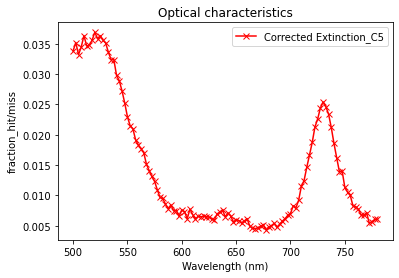

In [16]:
plt.plot(Wavelengths,Corr_Ext,'-rx')
plt.title('Optical characteristics')
plt.xlabel('Wavelength (nm)')
plt.ylabel('fraction_hit/miss')
plt.legend(['Corrected Extinction_C5'], loc='best')

## Finding the best-fit Lorentzian to the extinction data

In [17]:
xData=Wavelengths
yData=Corr_Ext

In [18]:
begin_index = np.nonzero(xData==680)[0][0]
end_index = len(xData)-1
fit_range = slice(begin_index, end_index)
xfit = xData[fit_range]
yfit = abs(yData[fit_range])

In [19]:
print(xfit)

[680.  682.5 685.  687.5 690.  692.5 695.  697.5 700.  702.5 705.  707.5
 710.  712.5 715.  717.5 720.  722.5 725.  727.5 730.  732.5 735.  737.5
 740.  742.5 745.  747.5 750.  752.5 755.  757.5 760.  762.5 765.  767.5
 770.  772.5 775.  777.5]


In [20]:
print(yfit)

72     0.004814
73     0.004982
74     0.005399
75     0.004722
76     0.005248
77     0.005737
78     0.006153
79     0.006711
80     0.007002
81     0.008285
82     0.007958
83     0.009184
84     0.011492
85     0.012442
86     0.014632
87     0.016652
88     0.018720
89     0.021276
90     0.022593
91     0.024388
92     0.025399
93     0.024643
94     0.023418
95     0.021215
96     0.018575
97     0.016209
98     0.013906
99     0.014050
100    0.011319
101    0.010522
102    0.009998
103    0.008256
104    0.008116
105    0.007687
106    0.006787
107    0.006696
108    0.007150
109    0.005429
110    0.005632
111    0.006060
dtype: float64


In [21]:
model=LorentzianModel()

<function matplotlib.pyplot.show(close=None, block=None)>

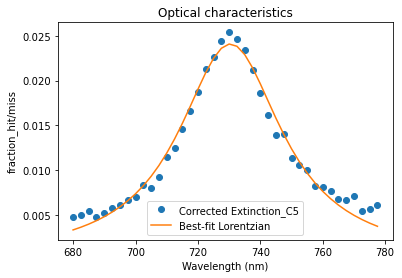

In [22]:
params=model.guess(yfit.values,x=xfit)
result=model.fit(yfit.values,params,x=xfit)
result.plot_fit()
plt.title('Optical characteristics')
plt.xlabel('Wavelength (nm)')
plt.ylabel('fraction_hit/miss')
plt.legend(['Corrected Extinction_C5','Best-fit Lorentzian'], loc='best')
plt.show

In [23]:
print(result.fit_report())

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 40
    # variables        = 3
    chi-square         = 4.0690e-05
    reduced chi-square = 1.0997e-06
    Akaike info crit   = -545.935917
    Bayesian info crit = -540.869279
[[Variables]]
    amplitude:  1.52451624 +/- 0.02880096 (1.89%) (init = 0.9692294)
    center:     730.389241 +/- 0.35102097 (0.05%) (init = 730)
    sigma:      20.1414917 +/- 0.54062573 (2.68%) (init = 12.5)
    fwhm:       40.2829835 +/- 1.08125146 (2.68%) == '2.0000000*sigma'
    height:     0.02409298 +/- 4.2509e-04 (1.76%) == '0.3183099*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.755


# Perform the above protocol for 10 consecutive scans taken at different reaction times to analyse the changes in the extinction trends and to check for any red or blue shifts of the extinction curve

## Actual sample measurement data for the 10 consecutive scans

In [24]:
hit_cons,repeat_cons = parameter_formatting_WL(filename3+'.csv',86,4,3)
hit_cons_Scat_byM = hit_cons.loc[:,'IS(A)']/hit_cons.loc[:,"M(V)"]
hit_cons_Scat_byM = hit_cons_Scat_byM.groupby(np.arange(len(hit_cons_Scat_byM))//repeat_cons).mean()
hit_cons_Ext_byM = hit_cons.loc[:,"R(V)"]/hit_cons.loc[:,"M(V)"]
hit_cons_Ext_byM = hit_cons_Ext_byM.groupby(np.arange(len(hit_cons_Ext_byM))//repeat_cons).mean()

In [25]:
hit_cons

,,Wavelength(nm),FocusCorrectionY[µm],Repeat(x),M(V),Phase('),IS(A),Phase(').1,R(V),Phase(').2
0,0,500.0,2.400,0,0.001703,1.83,2.920638e-11,0.27,0.000137,0.25
1,0,500.0,2.400,1,0.001701,1.83,2.930675e-11,0.29,0.000137,0.26
2,0,500.0,2.400,2,0.001698,1.82,2.880253e-11,0.27,0.000138,0.26
3,0,502.5,2.447,0,0.002746,1.82,4.907436e-11,0.27,0.000237,0.25
4,0,502.5,2.447,1,0.002741,1.82,4.959540e-11,0.27,0.000237,0.25
...,...,...,...,...,...,...,...,...,...,...
3385,9,777.5,-1.078,1,0.067157,1.82,1.597006e-09,0.27,0.005741,0.25
3386,9,777.5,-1.078,2,0.067187,1.82,1.596886e-09,0.27,0.005741,0.25
3387,9,780.0,-1.126,0,0.067246,1.82,1.586631e-09,0.27,0.005651,0.25
3388,9,780.0,-1.126,1,0.067246,1.82,1.586511e-09,0.27,0.005651,0.25


In [26]:
repeat_cons

3

In [27]:
print(hit_cons_Scat_byM)

0       1.711337e-08
1       2.312575e-08
2       1.891375e-08
3       1.964247e-08
4       2.035792e-08
            ...     
1125    2.404920e-08
1126    2.399734e-08
1127    2.391947e-08
1128    2.377553e-08
1129    2.358658e-08
Length: 1130, dtype: float64


In [28]:
print(hit_cons_Ext_byM)

0       0.080855
1       0.086291
2       0.091832
3       0.096460
4       0.101060
          ...   
1125    0.088929
1126    0.087894
1127    0.086824
1128    0.085473
1129    0.084021
Length: 1130, dtype: float64


## Correction data for sample absorption and scattering for 10 consecutive scans

In [29]:
miss_cons,repeat_cons = parameter_formatting_WL(filename4+'.csv')
miss_cons_Scat_byM = miss_cons.loc[:,'IS(A)']/miss_cons.loc[:,"M(V)"]
miss_cons_Scat_byM = miss_cons_Scat_byM.groupby(np.arange(len(miss_cons_Scat_byM))//repeat_cons).mean()
miss_cons_Ext_byM = miss_cons.loc[:,"R(V)"]/miss_cons.loc[:,"M(V)"]
miss_cons_Ext_byM = miss_cons_Ext_byM.groupby(np.arange(len(miss_cons_Ext_byM))//repeat_cons).mean()

In [30]:
miss_cons

,Wavelength(nm),FocusCorrectionY[µm],Repeat(x),M(V),Phase('),IS(A),Phase(').1,R(V),Phase(').2
0,500.0,2.400,0,0.001687,1.82,2.872533e-11,0.27,0.000136,0.25
1,500.0,2.400,1,0.001686,1.82,2.862458e-11,0.26,0.000136,0.25
2,500.0,2.400,2,0.001688,1.82,2.904429e-11,0.28,0.000137,0.25
3,502.5,2.447,0,0.002723,1.82,4.922353e-11,0.27,0.000235,0.26
4,502.5,2.447,1,0.002719,1.82,4.867434e-11,0.26,0.000235,0.25
...,...,...,...,...,...,...,...,...,...
334,777.5,-1.078,1,0.067216,1.82,1.592812e-09,0.27,0.005735,0.25
335,777.5,-1.078,2,0.067187,1.82,1.593255e-09,0.27,0.005739,0.25
336,780.0,-1.126,0,0.067216,1.82,1.581449e-09,0.27,0.005644,0.25
337,780.0,-1.126,1,0.067283,1.82,1.584201e-09,0.27,0.005655,0.25


In [31]:
print(miss_cons_Scat_byM)

0      1.707179e-08
1      1.799086e-08
2      1.886547e-08
3      1.962049e-08
4      2.031642e-08
           ...     
108    2.400309e-08
109    2.394645e-08
110    2.386700e-08
111    2.370852e-08
112    2.354230e-08
Length: 113, dtype: float64


In [32]:
print(miss_cons_Ext_byM)

0      0.080991
1      0.086311
2      0.091803
3      0.096316
4      0.100780
         ...   
108    0.088892
109    0.087847
110    0.086787
111    0.085372
112    0.084021
Length: 113, dtype: float64


## Store consecutive scan data separately for subsequent analyses

In [33]:
hit_cons_Ext = np.zeros((113,10))
for x in range(10):
    loc=113*x
    hit_cons_Ext[:,x]=hit_cons_Ext_byM[loc:(loc+113)]

In [34]:
print(np.matrix(hit_cons_Ext))

[[0.08085548 0.08090015 0.08091316 ... 0.08097389 0.08086765 0.08087423]
 [0.08629094 0.08638822 0.08648175 ... 0.08642875 0.08633967 0.08635945]
 [0.09183224 0.09179952 0.09177831 ... 0.09180571 0.09171798 0.09178345]
 ...
 [0.08688456 0.08682064 0.08687518 ... 0.08687288 0.08687975 0.08682383]
 [0.0854819  0.08546563 0.08549025 ... 0.08550834 0.08559239 0.08547273]
 [0.08411812 0.08405754 0.08420961 ... 0.08405152 0.08407813 0.08402069]]


## Generating Extinction curves for each of the 10 consecutive scans

In [35]:
Corr_cons_ext = np.zeros((113,10))
for x in range(10):
    Corr_cons_ext[:,x]=1.00-(hit_cons_Ext[:,x]/miss_cons_Ext_byM)

In [36]:
xData=np.zeros((10,113))
yData=np.zeros((10,113))
for x in range(10):
    xData[x,:]=Wavelengths
    yData[x,:]=Corr_cons_ext[:,x]

In [37]:
print(np.matrix(xData))

[[500.  502.5 505.  ... 775.  777.5 780. ]
 [500.  502.5 505.  ... 775.  777.5 780. ]
 [500.  502.5 505.  ... 775.  777.5 780. ]
 ...
 [500.  502.5 505.  ... 775.  777.5 780. ]
 [500.  502.5 505.  ... 775.  777.5 780. ]
 [500.  502.5 505.  ... 775.  777.5 780. ]]


In [38]:
print(np.matrix(yData))

[[ 1.66879803e-03  2.29964154e-04 -3.23269409e-04 ... -1.12015849e-03
  -1.28602088e-03 -1.15974330e-03]
 [ 1.11735454e-03 -8.97176943e-04  3.31946989e-05 ... -3.83641600e-04
  -1.09538298e-03 -4.38739342e-04]
 [ 9.56689359e-04 -1.98078082e-03  2.64162265e-04 ... -1.01208583e-03
  -1.38380560e-03 -2.24856680e-03]
 ...
 [ 2.06796755e-04 -1.36669461e-03 -3.43203108e-05 ... -9.85631135e-04
  -1.59575870e-03 -3.67061574e-04]
 [ 1.51856638e-03 -3.34617338e-04  9.21329640e-04 ... -1.06479073e-03
  -2.58021247e-03 -6.83784216e-04]
 [ 1.43737113e-03 -5.63860434e-04  2.08149640e-04 ... -4.20470410e-04
  -1.17858044e-03 -1.22147993e-07]]


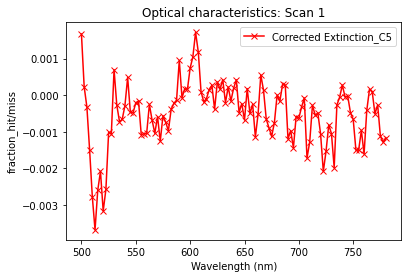

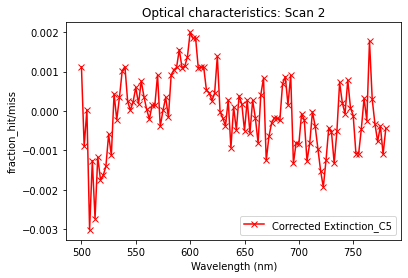

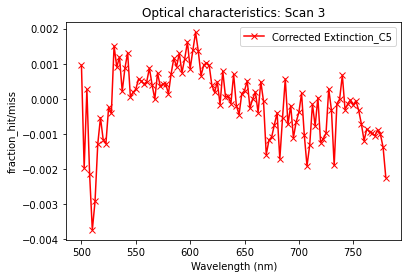

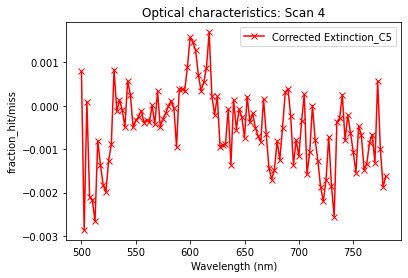

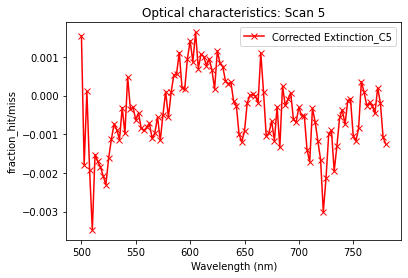

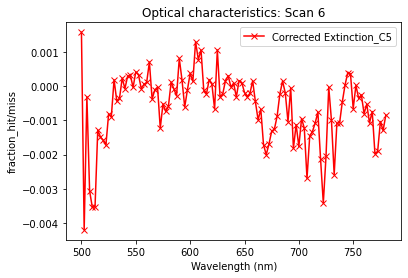

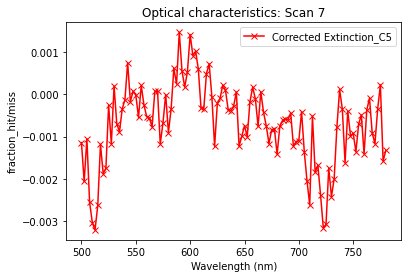

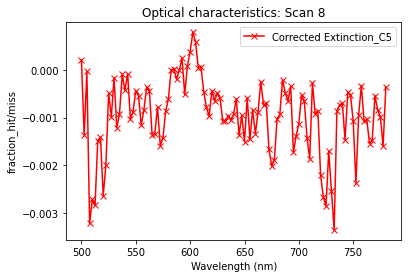

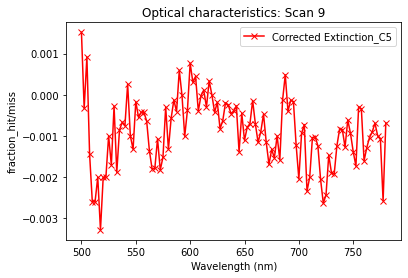

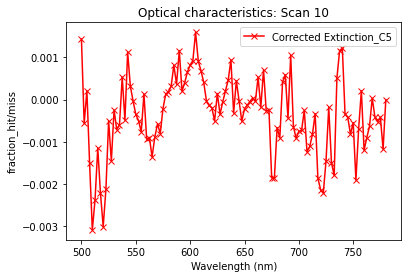

In [39]:
for x in range(10):
    plt.figure()
    plt.plot(xData[x,:],yData[x,:],'-rx')
    plt.title('Optical characteristics: Scan '+str(x+1))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('fraction_hit/miss')
    plt.legend(['Corrected Extinction_C5'], loc='best')
    plt.show()